In [ ]:
# Step 1 — Mount Google Drive for File Access

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Step#1** initializes access to your Google Drive within a Google Colab environment so that your notebook can read from and write to files stored there. By importing the drive module from google.colab and running drive.mount('/content/drive'), Colab prompts you to authenticate your Google account and then links your Drive to the notebook’s file system. Once mounted, all Drive folders become accessible under the /content/drive directory, allowing seamless loading of datasets, saving outputs, and maintaining a reproducible workflow.

**(Why This Step Matters)**
Mounting Google Drive is essential because Colab sessions are temporary and do not retain files after they end. By connecting to Drive, you ensure that your datasets, scripts, checkpoints, and generated outputs persist across sessions. It also standardizes file paths, making your workflow reproducible for collaborators and future runs. Without this step, the notebook would have no stable location to pull data from or save results to.

In [ ]:
# Step 2 — Load Cleaned Dataset into DataFrame

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/colorectal_cancer_prediction_cleaned_imputed.csv')
df.head()

,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


In [ ]:
Step#2 loads the cleaned and imputed colorectal cancer dataset from Google Drive into a pandas DataFrame so it can be explored, analyzed, and used in downstream modeling. By calling pd.read_csv() on the stored file path, the notebook imports all patient‑level variables—demographics, clinical history, diagnostic stage, treatment access, and outcomes—into a structured tabular format. Displaying df.head() provides a quick preview of the first few rows, confirming that the dataset has been successfully loaded and that the columns appear as expected before further preprocessing or feature engineering.

**Step#2** loads the cleaned and imputed colorectal cancer dataset from Google Drive into a pandas DataFrame so it can be explored, analyzed, and used in downstream modeling. By calling pd.read_csv() on the stored file path, the notebook imports all patient‑level variables—demographics, clinical history, diagnostic stage, treatment access, and outcomes—into a structured tabular format. Displaying df.head() provides a quick preview of the first few rows, confirming that the dataset has been successfully loaded and that the columns appear as expected before further preprocessing or feature engineering.

**(Why This Step Matters)**
Loading the cleaned dataset is foundational because every subsequent step—data validation, exploratory analysis, feature engineering, model training, and evaluation—depends on having the dataset correctly imported and structured. This step also ensures reproducibility: by explicitly referencing the file path and using a standardized loading command, collaborators can run the notebook without ambiguity. Additionally, previewing the dataset early helps catch issues such as missing columns, incorrect encodings, or unexpected values before deeper analysis begins.

In [ ]:
# Step 3 — Install Lifelines & Import Visualization Libraries

!pip install lifelines

from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.0/350.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 6.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=9681f938cad2f58c4aafc9aad4e685f2863c79d3bd5fa8bec8ce617e6a405838
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


**Step#3** prepares the environment for survival analysis by installing the lifelines library and importing the visualization tools needed for Kaplan–Meier survival curves. The command !pip install lifelines ensures that the survival‑analysis package and its dependencies are available in the Colab session, while the subsequent imports—KaplanMeierFitter from lifelines and matplotlib.pyplot for plotting—load the core functions required to fit survival models and generate visualizations. This step sets up the analytical toolkit that will be used to explore time‑to‑event outcomes such as survival time and recurrence.

**(Why This Step Matters)**
Survival analysis requires tools that are not included in Python’s standard library, and Colab sessions do not retain installed packages between runs. Installing lifelines ensures that the notebook has access to Kaplan–Meier estimators, Cox models, and other survival‑analysis methods. Importing visualization libraries is equally important because survival curves are central to interpreting time‑to‑event data. Without this step, the workflow would lack the statistical and graphical capabilities needed to analyze patient survival patterns or treatment effects.

In [ ]:
# Step 4 — Define Survival Time, Event Indicator, and Stratification Groups

# Adjust column names based on the dataset
time_col = 'Time_to_Recurrence'          # survival time

# The 'Recurrence' column indicates if an event (recurrence) occurred.
# Convert 'Yes' to 1 (event observed) and 'No' to 0 (censored).
event_col = 'Recurrence'
df['Event_Recurrence'] = df[event_col].map({'Yes': 1, 'No': 0})

group_col = 'Stage_at_Diagnosis'   # stratification variable

T = df[time_col]
E = df['Event_Recurrence'] # Use the newly created numerical event column
groups = df[group_col].unique()

**Step#4** prepares the dataset for survival analysis by defining the key variables required for modeling time‑to‑event outcomes. It identifies the column representing survival time (Time_to_Recurrence), converts the recurrence indicator into a numerical event variable (Event_Recurrence), and selects the clinical grouping variable (Stage_at_Diagnosis) used for stratification. By mapping “Yes” to 1 and “No” to 0, the step transforms categorical event data into the format expected by survival‑analysis tools such as Kaplan–Meier estimators. It also extracts the survival time vector (T), event vector (E), and the unique stratification groups needed for downstream analysis.

**(Why This Step Matters)**
Survival analysis requires data to be organized into three essential components: a time‑to‑event variable, an event indicator, and optional grouping variables for stratified curves. Raw clinical datasets rarely store these in the exact numerical format needed for modeling. This step ensures that the event column is properly encoded, the survival time is isolated, and the stratification groups are clearly defined. Without this preparation, survival models would fail or produce misleading results, and comparisons across diagnostic stages would not be possible.

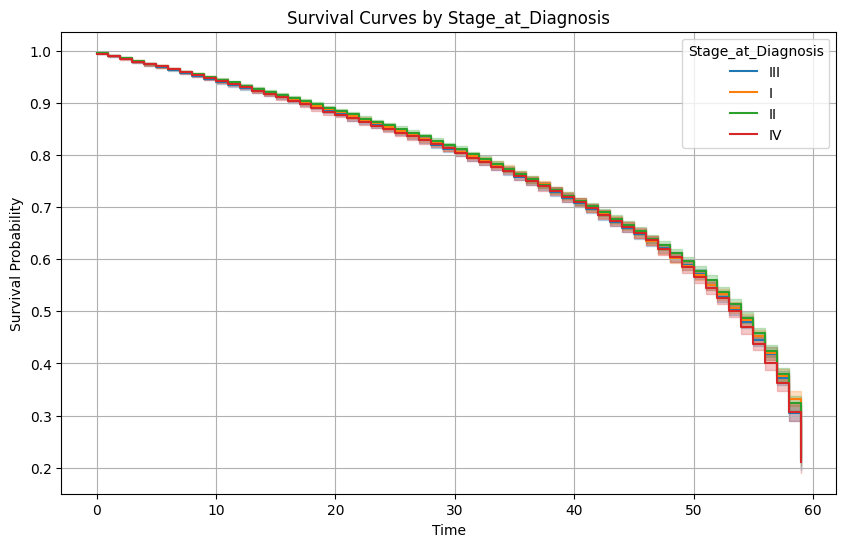

In [ ]:
# Step 5 — Generate Stratified Kaplan–Meier Survival Curves

plt.figure(figsize=(10,6))

for group in groups:
    ix = df[group_col] == group
    kmf = KaplanMeierFitter()
    kmf.fit(T[ix], event_observed=E[ix], label=str(group))
    kmf.plot_survival_function()

plt.title(f"Survival Curves by {group_col}")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.legend(title=group_col)
plt.grid(True)
plt.show()


**Step#5** generates Kaplan–Meier survival curves for each stratified group in the dataset, allowing you to visually compare survival probabilities across diagnostic stages. The code loops through each group in the stratification column, fits a Kaplan–Meier model using the corresponding survival time (T) and event indicator (E), and plots each group’s survival function on the same figure. Labels, axes, a legend, and gridlines are added to produce a clean, interpretable visualization that highlights differences in survival patterns over time.

**(Why This Step Matters)**
Kaplan–Meier curves are one of the most important tools in survival analysis because they reveal how survival probabilities change over time and how different patient groups compare. Plotting stratified curves—such as by stage at diagnosis—helps identify clinically relevant differences, potential risk gradients, and patterns that may guide further modeling or hypothesis generation. Without this visualization step, it would be difficult to interpret survival trends or communicate findings to clinicians, collaborators, or readers.

In [ ]:
# Step 6 — Save Survival Plot to Google Drive

import os

save_path = '/content/drive/MyDrive/projects/colorectal_cancer_prediction/results/'
os.makedirs(save_path, exist_ok=True)

plt.savefig(os.path.join(save_path, 'km_stratified_plot.png'), dpi=300)

<Figure size 640x480 with 0 Axes>

**Step#6** provides an optional but highly practical way to save the Kaplan–Meier survival plot directly to Google Drive, ensuring that visual results are preserved outside the temporary Colab environment. The code creates a directory path if it does not already exist, then uses plt.savefig() to export the figure as a high‑resolution PNG file. This step helps maintain an organized project structure by storing outputs in a dedicated results folder, making it easier to reference, share, or include the figure in reports, manuscripts, or presentations.

**(Why This Step Matters)**
Colab sessions are temporary, meaning any files not saved to an external location will be lost once the session ends. Saving figures to Google Drive ensures long‑term accessibility, supports version control of visual outputs, and keeps results organized for downstream use. This is especially important in clinical research workflows where figures often need to be revisited, compared, or included in formal documentation. Without this step, valuable visualizations could be lost or inconsistently stored.